# Linear regression with Alternative least square method(ALS)

Linear regression is the most basic application of machine learning. There are many approaches can do linear regression like: gradient descent, least square, variational bayes and neural network etc. Now we are going to solve the following multivariate linear regression with gradient descent.

$$y = f(\boldsymbol{X}) = \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3 \dots \omega_n x_n + b$$

Where <span style="color:blue">$\boldsymbol{X} = {x_1, x_2, x_3, \dots, x_n} $ </span> are variables, <span style="color:blue">$\boldsymbol{W} = {\omega_1, \omega_2, \dots, \omega_n}$</span> are weights of the linear model and <span style="color:blue">$b$</span> is the bias.

## Alternative least square method(ALS)
Firstly, the parameters in the linear model(eg.<span style="color:blue"> $\omega$</span> and <span style="color:blue">$b$</span>) are . And then the loss function denoting the distance between true value and predicted value is calculated as follow:

$$\Theta(\boldsymbol{w}) = \sum_{i=1}^{N}(f(\boldsymbol{X}_i) - y_i)^2 $$

Where <span style="color:blue">$N$</span> is the number of data points.

Then alternative least square method(ALS) is used to iteratively update the parameters <span style="color:blue">$\boldsymbol{W}$</span> and <span style="color:blue"> $b$ </span>. First, the partial derivative of <span style="color:blue"> $\Theta$</span> with respect to <span style="color:blue"> $\boldsymbol{W}$ </span> and <span style="color:blue"> $b$ </span> are calculated as follows:

$$\frac{\partial{\Theta}}{\partial{\boldsymbol{W}}} = 2 \sum_{i=1}^N (\boldsymbol{W}^\top\boldsymbol{X}_i + b - y_i)\boldsymbol{X}_i$$

$$\frac{\partial{\Theta}}{\partial{b}} = 2 \sum_{i=1}^N (\boldsymbol{W}^\top\boldsymbol{X}_i + b - y_i)$$

## Gradient descent
The partial derivatives derived above are used as momentum through which the parameters are updated to minimise the loss. The parameters <span style="color:blue"> $\boldsymbol{W}$ </span> and <span style="color:blue"> $b$ </span> are alternatively updated using gradient descent by follows:

$$\boldsymbol{W}_t = \boldsymbol{W}_{t-1} - \alpha_w \frac{\partial{\Theta}}{\partial{\boldsymbol{W}}}$$

$$b_t = b_{t-1} - \alpha_b \frac{\partial{\Theta}}{\partial{b}}$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#X is a N by n matrix which is N observations of the n dimensional points.
#y is the functional value of the observations X.
#iniW and inib are inital parameters.
#alpha_w and alpha_b are the learning rate with respect to W and b
#maxiter is the max itteration times of the ALS process.
def linreg_als(X, Y, iniW, inib, alpha_w, alpha_b, maxiter):
    W = iniW
    b = inib
    for i in range(maxiter):
        deriv_w = 2 * np.sum(np.multiply(X.T, (np.matmul(X, W) + b * np.ones(N) - Y)), axis = 1)
        deriv_b = 2 * np.sum(np.matmul(X, W) + b * np.ones(N) - Y)
        W = W - alpha_w * deriv_w
        b = b - alpha_b * deriv_b
    return W, b

Authentic value of weight W is:
[0.19555905]

Authentic value of bias b is:
0.05338976094031972

Weight calculated by ALS is:
[0.22127266]

Bias calculated by ALS is:
0.19376024265459244



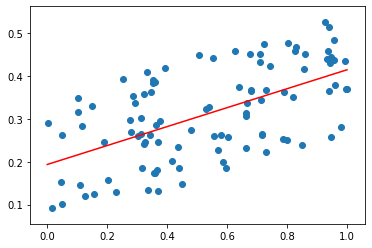

In [62]:
n = 1
N = 100
X = np.random.rand(N, n)
W_auth = np.random.rand(n)
b_auth = np.random.normal()
alpha_w = 0.001
alpha_b = 0.001
maxiter = 1000

Y = np.matmul(X, W_auth) + b_auth * np.ones(N) + np.random.rand(N)*0.3
iniW = np.random.rand(n)
inib = np.random.normal()

W, b = linreg_als(X, Y, iniW, inib, alpha_w, alpha_b, maxiter)
print("Authentic value of weight W is:")
print(W_auth) 
print()
print("Authentic value of bias b is:")
print(b_auth)
print()
print("Weight calculated by ALS is:")
print(W)
print()
print("Bias calculated by ALS is:")
print(b)
print()

if n == 1:
    plt.scatter(X, Y)
    x = np.linspace(0, 1, 100)
    y = np.multiply(x, W) + b * np.ones(N)
    plt.plot(x, y, "r")